In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv (r'/Users/dulcechavez/codeup-data-science/storytelling/teledata.csv')

In [6]:
df.describe()

,is_senior_citizen,partner_dependents,phone_service,internet_service,contract_type,monthly_charges,tenure,Start Date
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,0.162147,1.082209,1.325004,1.222916,0.690473,64.761692,31.919779,2.018456e+07
std,0.368612,1.226274,0.642730,0.778877,0.833755,30.090047,24.542689,2.089442e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,2.014123e+07
25%,0.000000,0.000000,1.000000,1.000000,0.000000,35.500000,8.000000,2.016123e+07
50%,0.000000,1.000000,1.000000,1.000000,0.000000,70.350000,28.000000,2.019033e+07
75%,0.000000,2.000000,2.000000,2.000000,1.000000,89.850000,55.000000,2.020113e+07
max,1.000000,3.000000,2.000000,2.000000,2.000000,118.750000,79.000000,2.021073e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   is_senior_citizen       7043 non-null   int64  
 3   partner                 7043 non-null   object 
 4   dependents              7043 non-null   object 
 5   partner_dependents      7043 non-null   int64  
 6   phone_service           7043 non-null   int64  
 7   internet_service        7043 non-null   int64  
 8   has_phone_and_internet  7043 non-null   bool   
 9   contract_type           7043 non-null   int64  
 10  payment_type            7043 non-null   object 
 11  monthly_charges         7043 non-null   float64
 12  total_charges           7032 non-null   object 
 13  churn                   7043 non-null   object 
 14  tenure                  7043 non-null   

In [9]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,partner_dependents,phone_service,internet_service,has_phone_and_internet,contract_type,...,Check,Start Date,is_female,has_churned,has_phone,has_internet,Contract Type,Phone Service,Internet Service,service_type
0,0002-ORFBO,Female,0,Yes,Yes,3,1,1,True,1,...,FALSE,20201027,True,False,True,True,1 Year,One Line,DSL,Phone & Internet
1,0003-MKNFE,Male,0,No,No,0,2,1,True,0,...,FALSE,20201027,False,False,True,True,Month-to-Month,Two or More Lines,DSL,Phone & Internet
2,0004-TLHLJ,Male,0,No,No,0,1,2,True,0,...,FALSE,20210427,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
3,0011-IGKFF,Male,1,Yes,No,1,1,2,True,0,...,FALSE,20200727,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
4,0013-EXCHZ,Female,1,Yes,No,1,1,2,True,0,...,FALSE,20210427,True,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet


In [85]:
has_churned = df[df["has_churned"]]

In [86]:
len(has_churned)

1869

In [87]:
new_df = has_churned[has_churned["Contract Type"] == "Month-to-Month"]

In [88]:
len(new_df)

1655

In [89]:
new_df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,partner_dependents,phone_service,internet_service,has_phone_and_internet,contract_type,...,Check,Start Date,is_female,has_churned,has_phone,has_internet,Contract Type,Phone Service,Internet Service,service_type
2,0004-TLHLJ,Male,0,No,No,0,1,2,True,0,...,FALSE,20210427,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
3,0011-IGKFF,Male,1,Yes,No,1,1,2,True,0,...,FALSE,20200727,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
4,0013-EXCHZ,Female,1,Yes,No,1,1,2,True,0,...,FALSE,20210427,True,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
19,0023-HGHWL,Male,1,No,No,0,0,1,False,0,...,TRUE,20210627,False,True,False,True,Month-to-Month,No Phone Service,DSL,Internet Only
21,0023-XUOPT,Female,0,Yes,No,1,2,2,True,0,...,FALSE,20200727,True,True,True,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone & Internet


In [90]:
new_df["tenure"].describe()

count    1655.000000
mean       13.627795
std        15.771546
min         1.000000
25%         1.000000
50%         7.000000
75%        21.000000
max        71.000000
Name: tenure, dtype: float64

<AxesSubplot:ylabel='tenure'>

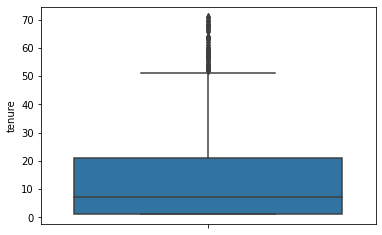

In [91]:
sns.boxplot(data=new_df, y='tenure')

In [92]:

first_quartile = np.percentile(new_df["tenure"], 25)

In [93]:
third_quartile = np.percentile(new_df["tenure"], 75)

In [94]:
third_quartile

21.0

In [95]:
iqr = third_quartile - first_quartile

In [96]:
iqr

20.0

In [97]:
upperbound = third_quartile + (1.5*iqr)

In [98]:
upperbound

51.0

In [99]:
lowerbound = first_quartile - (1.5*iqr)

In [100]:
lowerbound

-29.0

In [101]:
lowerbound = 0

In [102]:
new_df = new_df[new_df["tenure"] <= upperbound] #decided to keep my upperbound 

In [103]:
new_df

,customer_id,gender,is_senior_citizen,partner,dependents,partner_dependents,phone_service,internet_service,has_phone_and_internet,contract_type,...,Check,Start Date,is_female,has_churned,has_phone,has_internet,Contract Type,Phone Service,Internet Service,service_type
2,0004-TLHLJ,Male,0,No,No,0,1,2,True,0,...,FALSE,20210427,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
3,0011-IGKFF,Male,1,Yes,No,1,1,2,True,0,...,FALSE,20200727,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
4,0013-EXCHZ,Female,1,Yes,No,1,1,2,True,0,...,FALSE,20210427,True,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
19,0023-HGHWL,Male,1,No,No,0,0,1,False,0,...,TRUE,20210627,False,True,False,True,Month-to-Month,No Phone Service,DSL,Internet Only
21,0023-XUOPT,Female,0,Yes,No,1,2,2,True,0,...,FALSE,20200727,True,True,True,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone & Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Male,1,No,No,0,1,2,True,0,...,FALSE,20191127,False,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
7023,9965-YOKZB,Male,1,No,No,0,2,2,True,0,...,FALSE,20201027,False,True,True,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone & Internet
7036,9985-MWVIX,Female,0,No,No,0,1,2,True,0,...,TRUE,20210627,True,True,True,True,Month-to-Month,One Line,Fiber Optic,Phone & Internet
7037,9986-BONCE,Female,0,No,No,0,1,0,False,0,...,FALSE,20210327,True,True,True,False,Month-to-Month,One Line,No Internet Service,Phone Only


<AxesSubplot:xlabel='tenure', ylabel='Count'>

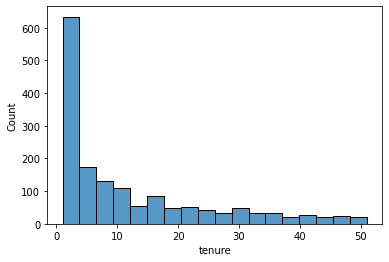

In [104]:
sns.histplot(data=new_df["tenure"])

<AxesSubplot:ylabel='tenure'>

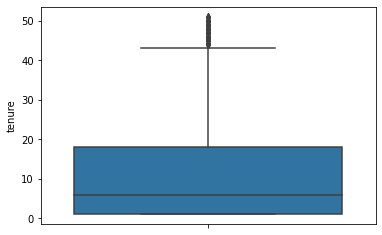

In [105]:
sns.boxplot(data=new_df, y='tenure')

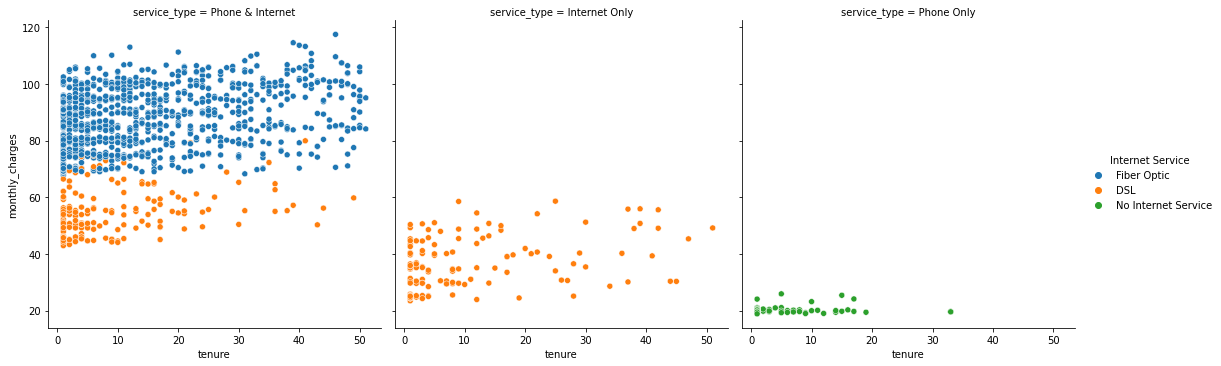

In [130]:
sns.relplot(x='tenure', y='monthly_charges', col="service_type", hue="Internet Service", data=new_df)

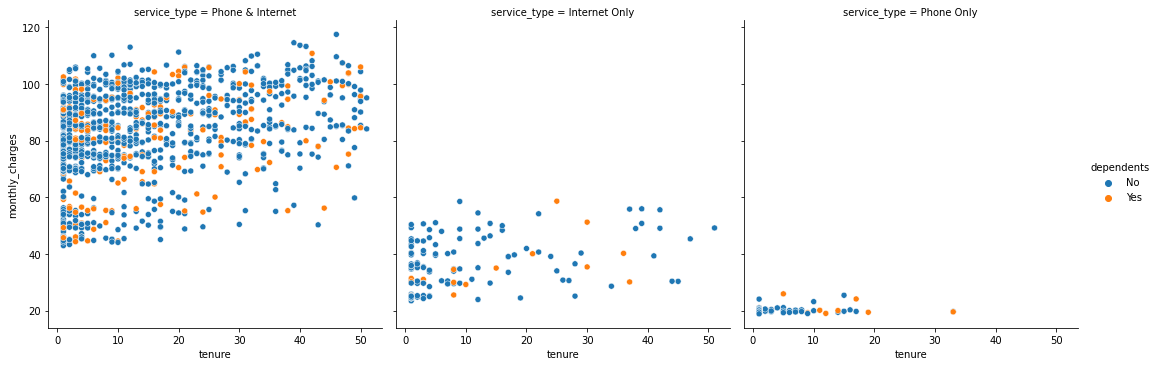

In [132]:
sns.relplot(x='tenure', y='monthly_charges', col="service_type", hue="dependents", data=new_df)

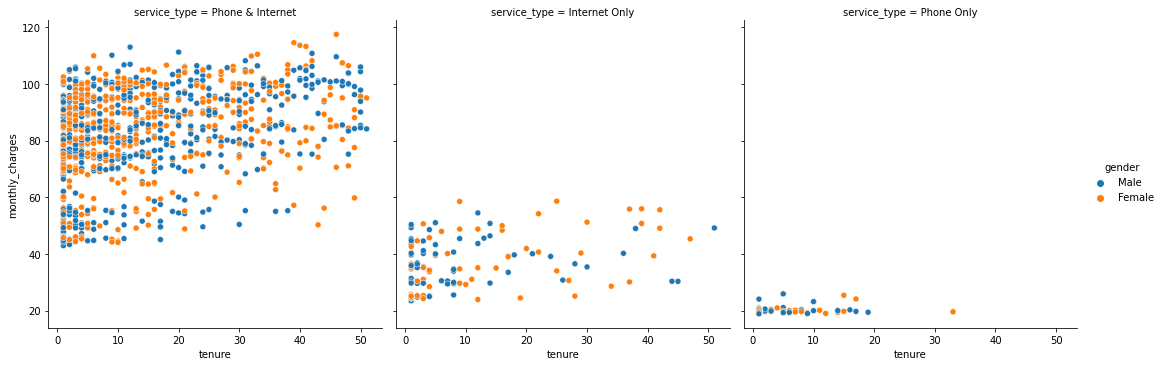

In [126]:
sns.relplot(x='tenure', y='monthly_charges', col="service_type", hue="gender", data=new_df)

In [ ]:
#  0   customer_id             7043 non-null   object 
#  1   gender                  7043 non-null   object 
#  2   is_senior_citizen       7043 non-null   int64  
#  3   partner                 7043 non-null   object 
#  4   dependents              7043 non-null   object 
#  5   partner_dependents      7043 non-null   int64  
#  6   phone_service           7043 non-null   int64  
#  7   internet_service        7043 non-null   int64  
#  8   has_phone_and_internet  7043 non-null   bool   
#  9   contract_type           7043 non-null   int64  
#  10  payment_type            7043 non-null   object 
#  11  monthly_charges         7043 non-null   float64
#  12  total_charges           7032 non-null   object 
#  13  churn                   7043 non-null   object 
#  14  tenure                  7043 non-null   int64  
#  15  avg charges             7043 non-null   object 
#  16  Check                   7043 non-null   object 
#  17  Start Date              7043 non-null   int64  
#  18  is_female               7043 non-null   bool   
#  19  has_churned             7043 non-null   bool   
#  20  has_phone               7043 non-null   bool   
#  21  has_internet            7043 non-null   bool   
#  22  Contract Type           7043 non-null   object 
#  23  Phone Service           7043 non-null   object 
#  24  Internet Service        7043 non-null   object 
#  25  service_type            7043 non-null   object 
# dtypes: bool(5), float64(1), int64(7), object(13)
# memory usage: 1.2+ MB

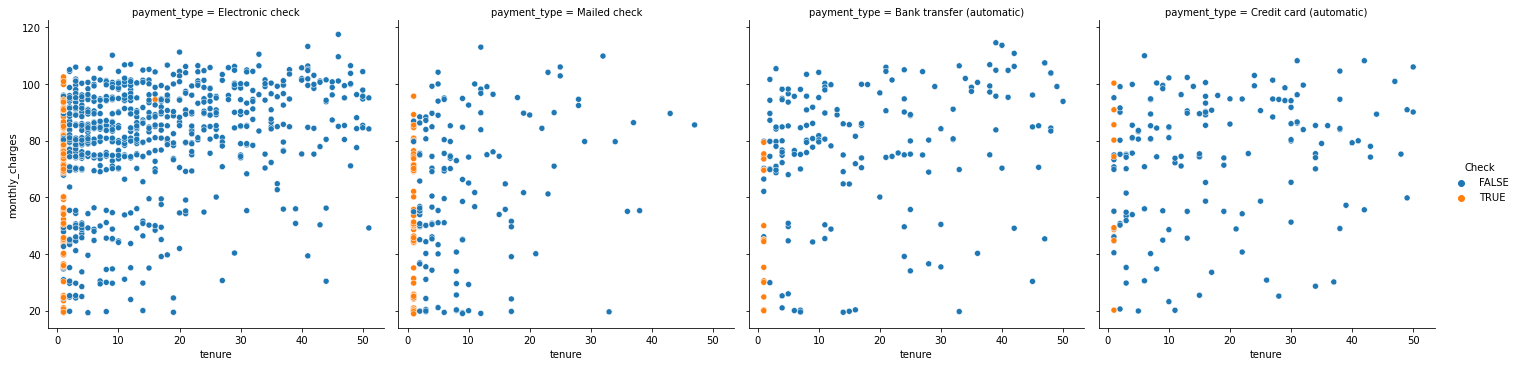

In [157]:
sns.relplot(x='tenure', y='monthly_charges', col="payment_type", hue="Check", data=new_df)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

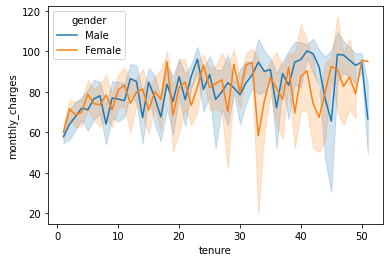

In [122]:
sns.lineplot(x='tenure', y='monthly_charges', hue='gender', data=new_df)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

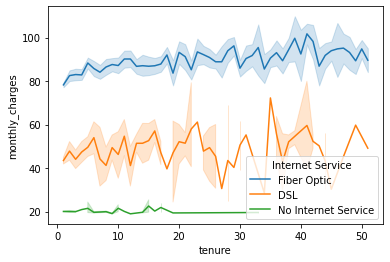

In [135]:
sns.lineplot(x='tenure', y='monthly_charges', hue='Internet Service', data=new_df)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

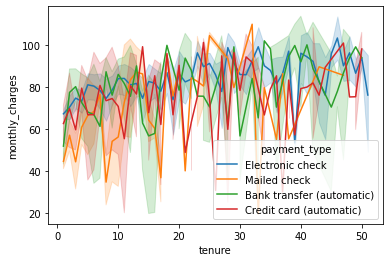

In [141]:
sns.lineplot(x='tenure', y='monthly_charges', hue="payment_type",data=new_df)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

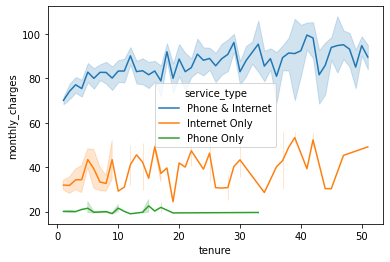

In [136]:
sns.lineplot(x='tenure', y='monthly_charges', hue='service_type', data=new_df)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

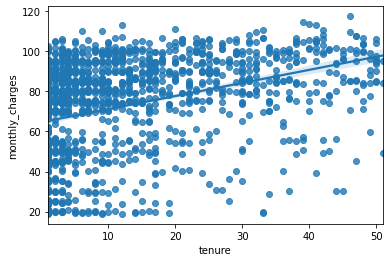

In [117]:
sns.regplot(x='tenure', y='monthly_charges', data=new_df)